In [27]:
#pip install tensorflow opencv-python matplotlib


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
import os
import shutil
import random

base_dir = r"C:\Users\HarithaNagamalla\Downloads\archive\Data"

source_dirs = {
    "Face": r"C:\Users\HarithaNagamalla\Downloads\archive\Data\Face\Face",
    "Non-Face": r"C:\Users\HarithaNagamalla\Downloads\archive\Data\Non_Face\Non_Face"
}

split_ratio = 0.8
image_exts = (".jpg", ".jpeg", ".png")

for label, src_dir in source_dirs.items():
    images = [f for f in os.listdir(src_dir) if f.lower().endswith(image_exts)]
    random.shuffle(images)

    split = int(len(images) * split_ratio)
    train_imgs = images[:split]
    val_imgs = images[split:]

    train_dir = os.path.join(base_dir, "Train", label)
    val_dir = os.path.join(base_dir, "Val", label)

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(src_dir, img), os.path.join(train_dir, img))

    for img in val_imgs:
        shutil.copy(os.path.join(src_dir, img), os.path.join(val_dir, img))

print("✅ Dataset split completed successfully!")


✅ Dataset split completed successfully!


In [3]:
img_size = 128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    r"C:\Users\HarithaNagamalla\Downloads\archive\Data\Train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    r"C:\Users\HarithaNagamalla\Downloads\archive\Data\Val",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2624 images belonging to 2 classes.
Found 1293 images belonging to 2 classes.


In [4]:
print(train_data.class_indices)

{'Face': 0, 'Non-Face': 1}


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\HarithaNagamalla\Documents\Python and ML\python_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_data,epochs=20,validation_data=val_data)

Epoch 1/20
 4/82 ━━━━━━━━━━━━━━━━━━━━ 2:18 2s/step - accuracy: 0.4564 - loss: 1.0787

c:\Users\HarithaNagamalla\Documents\Python and ML\python_venv\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


82/82 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.7138 - loss: 0.5612 - val_accuracy: 0.8940 - val_loss: 0.2811
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8655 - loss: 0.3286 - val_accuracy: 0.9250 - val_loss: 0.2029
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9005 - loss: 0.2409 - val_accuracy: 0.9296 - val_loss: 0.1812
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9322 - loss: 0.1829 - val_accuracy: 0.9629 - val_loss: 0.1203
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9337 - loss: 0.1573 - val_accuracy: 0.9698 - val_loss: 0.0812
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9428 - loss: 0.1526 - val_accuracy: 0.9629 - val_loss: 0.0858
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9615 - loss: 0.1029 - val_accuracy: 0.9830 - val_loss: 0.0551
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9665 - loss: 0.0966 - val_accuracy: 0.9861 - val_loss: 0.

In [7]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 442ms/step - accuracy: 0.9961 - loss: 0.0110
Validation Accuracy: 99.61%


In [8]:
import cv2
import numpy as np

img_path = r"C:\Users\HarithaNagamalla\Downloads\archive\Data\Non_Face\Non_Face\0001.png"

img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
img = img / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)[0][0]

if pred < 0.5:
    print("Human Face")
else:
    print("Non - Human Face")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Non - Human Face


41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 451ms/step
Confusion Matrix


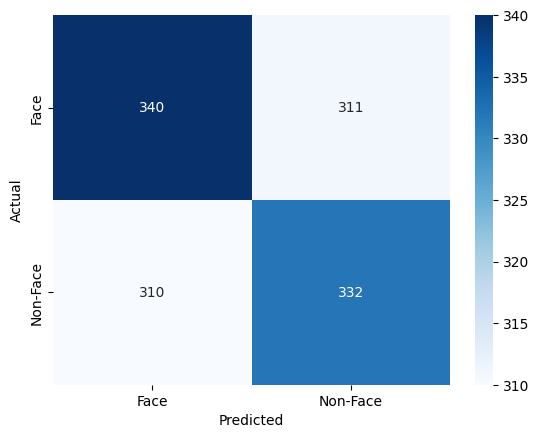

Classification Report
              precision    recall  f1-score   support

        Face       0.52      0.52      0.52       651
    Non-Face       0.52      0.52      0.52       642

    accuracy                           0.52      1293
   macro avg       0.52      0.52      0.52      1293
weighted avg       0.52      0.52      0.52      1293



In [9]:
val_data.reset()
Y_pred = model.predict(val_data)
y_pred = (Y_pred > 0.5).astype(int).reshape(-1)
print('Confusion Matrix')
cm = confusion_matrix(val_data.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Face', 'Non-Face'], yticklabels=['Face', 'Non-Face'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('Classification Report')
print(classification_report(val_data.classes, y_pred, target_names=['Face', 'Non-Face']))